### Step:1 Import Image

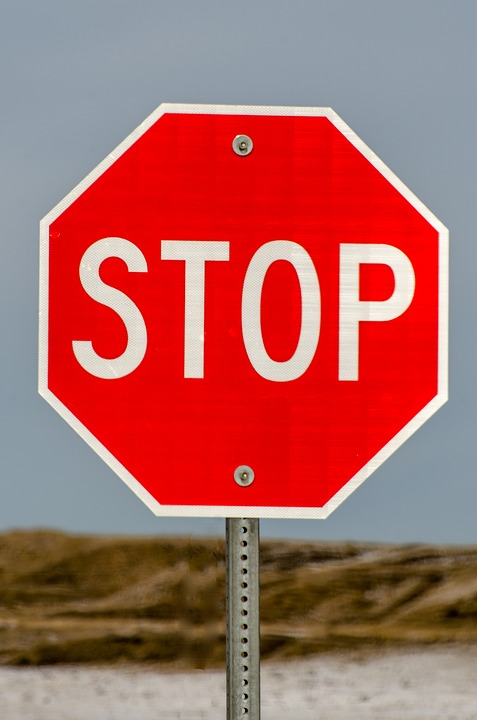

In [3]:
from PIL import Image
import numpy as np

im = Image.open('bnn/road_signs/stop.jpg')
im 

### Step:2 Plotting Histograms
Using Matplotlib
Matplotlib comes with a histogram plotting function : matplotlib.pyplot.hist()

It directly finds the histogram and plot it. You need not use calcHist() or np.histogram() function to find the histogram. See the code below:

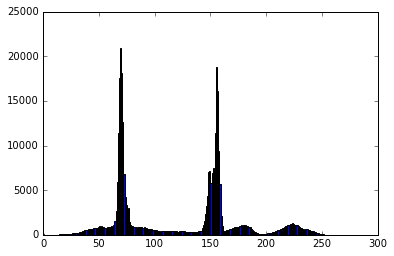

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('bnn/road_signs/stop.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

you can use normal plot of matplotlib, which would be good for BGR plot

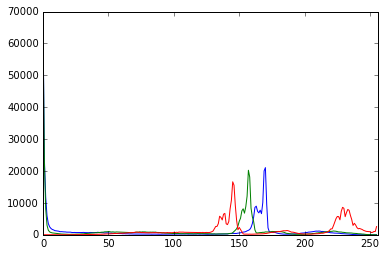

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('bnn/road_signs/stop.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### Application of Mask
 I used cv2.calcHist() to find the histogram of the full image.

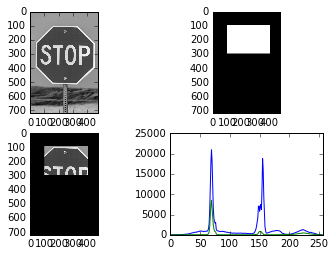

In [5]:
img = cv2.imread('bnn/road_signs/stop.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

See the result. In the histogram plot, blue line shows histogram of full image while green line shows histogram of masked region.